# convolution examples
#### Convolution as a filter
Our objective here is the following:
* define a function that can be used to create a FIR filter kernel
* verify the function


front matter...

In [33]:
import numpy as np

# so we can plot training data
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [2.5 * 4.8, 3.6]

### define a fir filter generator
This is one of my favorite little fir kernel generator formulas. a_in is the desired magnitude response for 0 to 0.5 of the normalized frequency. by default, this produces a linear phase filter, but if you want phase_offset can specify the delay (to create a hilbert transformer, for example). phase_offset can be an numpy array if you wish to specify phase response by frequency bin.

In [114]:
def fir_kernel(a_in, phase_offset=0):
    a = np.asarray(a_in)
    N = len(a)*2 - 1

    linear_phase = (-1*np.pi*(N-1) / N ) * np.arange( (N-1)/2+1 )

    half_form = np.multiply( a_in, np.exp( 1j * (np.add(phase_offset, linear_phase) ) ) )
    full_form = np.append( half_form, np.conj( half_form[:0:-1] ) )

    wave_out  = np.real( np.fft.ifft(full_form) )
    
    return wave_out

Here's our kernel generator in action. Let's first define a simple magnitude response, and plot the resulting kernel, magnitude response and phase response

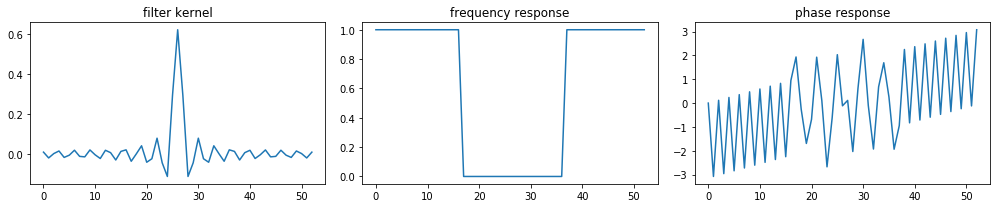

In [58]:
a_in = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

wave_out = fir_kernel(a_in)

plt.subplot(1, 3, 1)
plt.title("filter kernel")
plt.plot(wave_out)
plt.subplot(1, 3, 2)
plt.title("frequency response")
plt.plot( np.abs(np.fft.fft(wave_out)))
plt.subplot(1, 3, 3)
plt.title("phase response")
plt.plot( np.angle(np.fft.fft(wave_out)))

plt.rcParams['figure.figsize'] = [14.0, 3.0]
plt.tight_layout()
plt.show()

Ok, that's nice. Let's make a larger kernel though, and get some real crisp decimation in frequency.

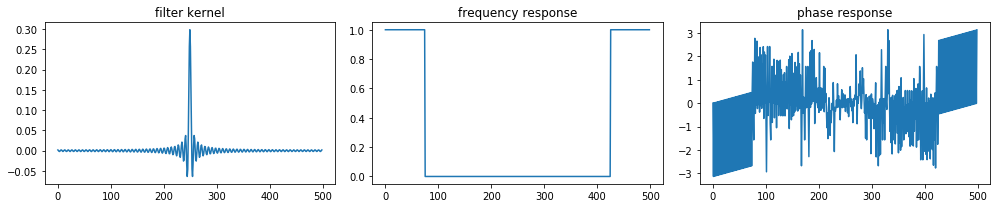

In [60]:
a_in = np.append( np.ones(75), np.zeros(175))

wave_out = fir_kernel(a_in)

plt.subplot(1, 3, 1)
plt.title("filter kernel")
plt.plot(wave_out)
plt.subplot(1, 3, 2)
plt.title("frequency response")
plt.plot( np.abs(np.fft.fft(wave_out)))
plt.subplot(1, 3, 3)
plt.title("phase response")
plt.plot( np.angle(np.fft.fft(wave_out)))

plt.rcParams['figure.figsize'] = [14.0, 3.0]
plt.tight_layout()
plt.show()

Sweet! Ok, now time to use our filter.

Let do the following:
* create our kernel
* define a random waveform
* filter the waveform with our kernel

shape of x is        (1000,)
shape of wave_out is (499,)
shape of y is        (1000,)


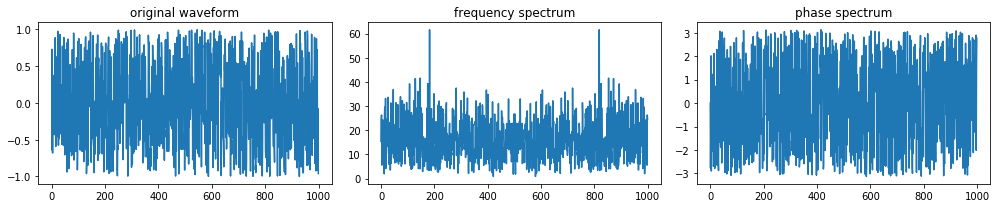

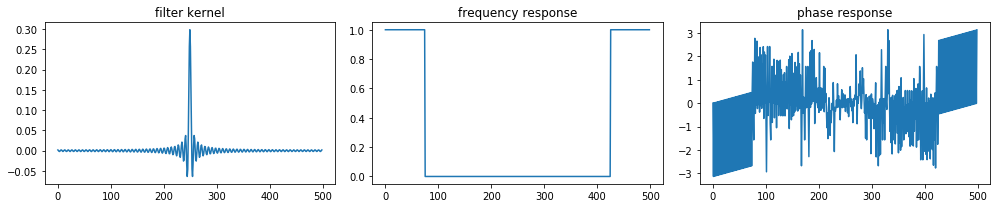

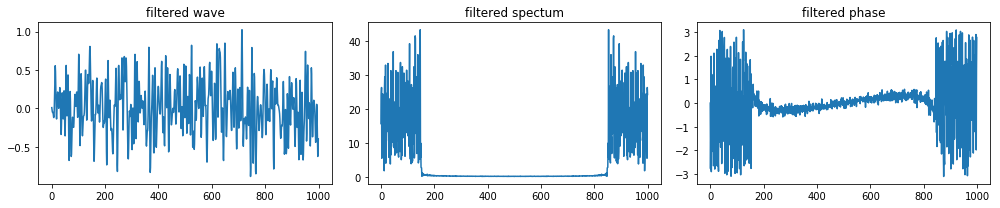

In [106]:
x = np.array(2*np.random.rand(1,1000)-1.0, dtype=np.float32).reshape(1000)

a_in = np.append( np.ones(75), np.zeros(175))
wave_out = fir_kernel(a_in).reshape(499)

y = np.convolve(x, np.array(wave_out), 'same')
print("shape of x is        {}".format(x.shape))
print("shape of wave_out is {}".format(wave_out.shape))
print("shape of y is        {}".format(y.shape))

plt.subplot(1, 3, 1)
plt.title("original waveform")
plt.plot(x)
plt.subplot(1, 3, 2)
plt.title("frequency spectrum")
plt.plot( np.abs(np.fft.fft(x)))
plt.subplot(1, 3, 3)
plt.title("phase spectrum")
plt.plot( np.angle(np.fft.fft(x)))

plt.rcParams['figure.figsize'] = [14.0, 3.0]
plt.tight_layout()
plt.show()

plt.subplot(1, 3, 1)
plt.title("filter kernel")
plt.plot(wave_out)
plt.subplot(1, 3, 2)
plt.title("frequency response")
plt.plot( np.abs(np.fft.fft(wave_out)))
plt.subplot(1, 3, 3)
plt.title("phase response")
plt.plot( np.angle(np.fft.fft(wave_out)))

plt.rcParams['figure.figsize'] = [14.0, 3.0]
plt.tight_layout()
plt.show()

plt.subplot(1, 3, 1)
plt.title("filtered wave")
plt.plot(y)
plt.subplot(1, 3, 2)
plt.title("filtered spectum")
plt.plot( np.abs(np.fft.fft(y)))
plt.subplot(1, 3, 3)
plt.title("filtered phase")
plt.plot( np.angle(np.fft.fft(y)))

plt.rcParams['figure.figsize'] = [14.0, 3.0]
plt.tight_layout()
plt.show()


soooooo, what can be seen above is that the spectrum of the kernel was multiplicatively projected upon the specturm of the original signal via the process of convolution. That is to say that the spectrum has been filtered by convolution. Cooking with gas. Ok, let's push this a little further with phase delay. Here's the goal

* create a waveform
* generate a phase shifting filter
* evalutate the result.

Got it? ok, rock and roll.

shape of x is        (999,)
shape of wave_out is (199,)
shape of y is        (999,)


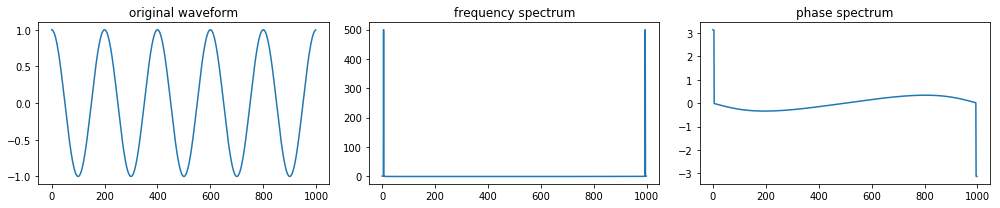

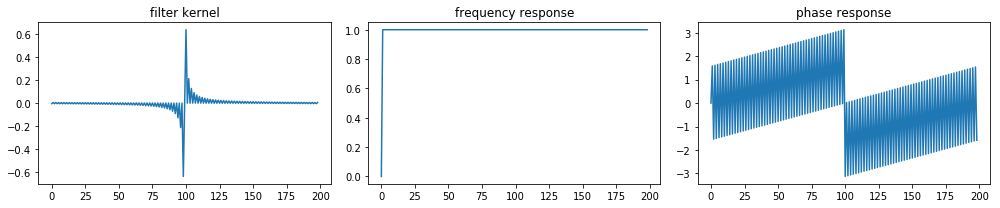

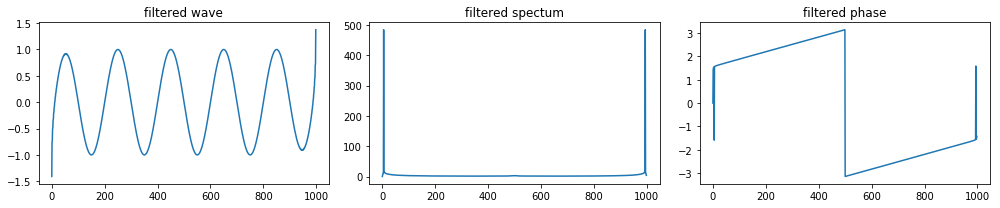

In [117]:
x = np.cos( 2*np.pi*5*np.arange(999)/1000 )

a_in = np.ones(100)
wave_out = fir_kernel(a_in, -1*np.pi/2.0).reshape(199)

y = np.convolve(x, np.array(wave_out), 'same')
print("shape of x is        {}".format(x.shape))
print("shape of wave_out is {}".format(wave_out.shape))
print("shape of y is        {}".format(y.shape))

plt.subplot(1, 3, 1)
plt.title("original waveform")
plt.plot(x)
plt.subplot(1, 3, 2)
plt.title("frequency spectrum")
plt.plot( np.abs(np.fft.fft(x)))
plt.subplot(1, 3, 3)
plt.title("phase spectrum")
plt.plot( np.angle(np.fft.fft(x)))

plt.rcParams['figure.figsize'] = [14.0, 3.0]
plt.tight_layout()
plt.show()

plt.subplot(1, 3, 1)
plt.title("filter kernel")
plt.plot(wave_out)
plt.subplot(1, 3, 2)
plt.title("frequency response")
plt.plot( np.abs(np.fft.fft(wave_out)))
plt.subplot(1, 3, 3)
plt.title("phase response")
plt.plot( np.angle(np.fft.fft(wave_out)))

plt.rcParams['figure.figsize'] = [14.0, 3.0]
plt.tight_layout()
plt.show()

plt.subplot(1, 3, 1)
plt.title("filtered wave")
plt.plot(y)
plt.subplot(1, 3, 2)
plt.title("filtered spectum")
plt.plot( np.abs(np.fft.fft(y)))
plt.subplot(1, 3, 3)
plt.title("filtered phase")
plt.plot( np.angle(np.fft.fft(y)))

plt.rcParams['figure.figsize'] = [14.0, 3.0]
plt.tight_layout()
plt.show()


So there are some transients at the beginning and end - but other than that I'd say we're cooking with gasoline.

Cool. So now let's do something interesting. Let's see if tensorflow can deduce our kernel. Here's the plan:
* create a kernel
* use the kernel to produce some training data
*

In [118]:
import tensorflow as tf

Here's a little method that we can use to produce batches of filtered data. This method:
* takes as input:
    * a kernel
    * a number of i/o vectors to produce
    * and the size of each vector

* and produces 
    * a random vector to be used as input
    * a convolved (filtered) vector to be used as output

a simple multiplicative kernel verifies its operation

In [155]:
def produce_batches(kernel, num_vects=100, vect_size=1000):
    in_data, out_data = [], []
    for _ in range(num_vects):
        x = np.array(2*np.random.rand(1,vect_size)-1.0, dtype=np.float32).reshape(vect_size)
        y = np.convolve(x, kernel, 'same')

        in_data.append(x) 
        out_data.append(y)
    return np.asarray(in_data), np.asarray(out_data)

x, y = produce_batches([0, 10, 0], num_vects=2, vect_size=5)
print(x, "\n")
print(y)

[[ 0.34318095  0.02726878  0.56542319  0.07850596  0.6915006 ]
 [ 0.20245673  0.93255168 -0.48011801 -0.43608007 -0.66183352]] 

[[ 3.43180954  0.2726878   5.65423191  0.78505963  6.91500604]
 [ 2.02456728  9.32551682 -4.80118006 -4.36080068 -6.61833525]]


In [149]:
a_in = np.ndarray.flatten( np.asarray([np.ones(25), np.zeros(25), np.ones(25), np.zeros(25), np.ones(25), np.zeros(25), np.ones(25), np.zeros(25)] ))
print(a_in)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


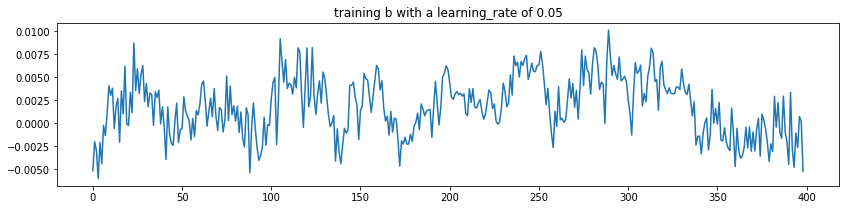

In [160]:
a_in = np.ndarray.flatten( np.asarray([np.ones(25), np.zeros(25), np.ones(25), np.zeros(25), np.ones(25), np.zeros(25), np.ones(25), np.zeros(25)] ))
actual_kernel = fir_kernel(a_in).reshape(399)

source = tf.placeholder(dtype=tf.float32)
labels = tf.placeholder(dtype=tf.float32)

kernel = tf.Variable( tf.zeros(399), dtype=tf.float32 )

x      = tf.reshape(source, [1, 1, 1000, 1])
kernel = tf.reshape(kernel, [1, 399, 1, 1])

logits = tf.nn.conv2d( x, kernel, strides=[1,1,1,1], padding="SAME")

loss   = tf.reduce_sum(tf.square(logits-labels))

train_op = tf.train.AdamOptimizer(learning_rate=0.05).minimize(loss)

init_op  = tf.global_variables_initializer()

with tf.Session() as sess:

    # initialize global variables
    sess.run(init_op)

    b_x, b_y = produce_batches(actual_kernel, num_vects=500, vect_size=1000)
   
    # run the training operation 
    for indx in range(500):
        sess.run(train_op, feed_dict={source: b_x[indx,], labels:b_y[indx,]})

    k_eval = sess.run(kernel)    
    
    # display the final trained value 
#     print("after training 300 iterations, kernel = {}".format(k_eval))

    plt.plot(np.ndarray.flatten(k_eval))
    plt.title("training b with a learning_rate of 0.05")
    